# Hyper-parameter Tuning in SVM: 8x8 Handwritten Digit Recognition
Import libraries, then load data set.

(1797, 64)


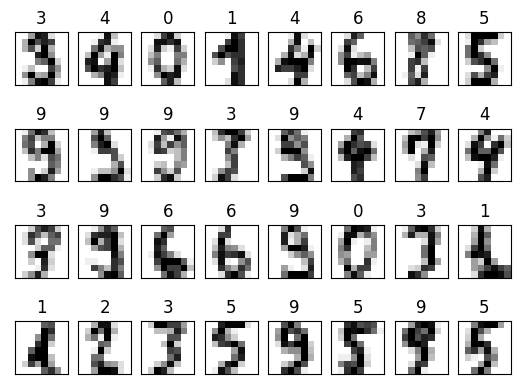

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import random
X, y = load_digits(return_X_y=True)
print(X.shape)
random.seed(0)

rows, cols = 4, 8
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',
                       subplot_kw=dict(xticks=[], yticks=[]))

for row in range(rows):
    for col in range(cols):
        n = np.random.randint(1796)+1    # show random samples
        im = ax[row, col].imshow(X[n].reshape((8,8)), cmap=plt.cm.binary)
        ax[row, col].set_title(y[n])
        im.set_clim(0, 16)
        #print(X[n])

plt.show()

Import libraries for Hyper-parameter Search

In [2]:
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Grid Search the Best SVM

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=

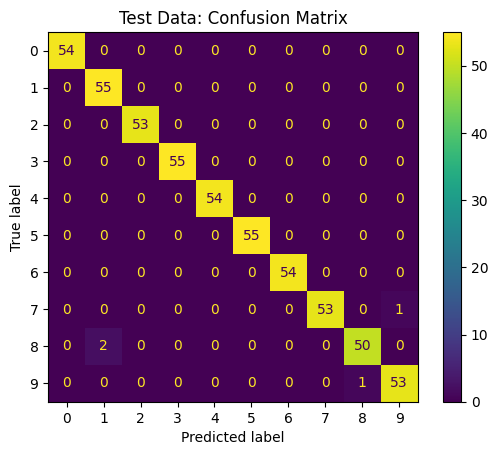

In [3]:
# Specify the grid: parameters and values
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']} 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

start = time()
grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_["params"])))

# Print best parameters after tuning
print(grid_search.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

grid_predictions = grid_search.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

cfm = confusion_matrix(y_test, grid_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = np.arange(0,10))
cm_display.plot()
plt.title('Test Data: Confusion Matrix')
plt.show()

True: 7, Predicted: 9


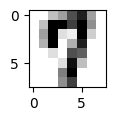

True: 8, Predicted: 1


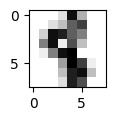

True: 8, Predicted: 1


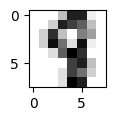

True: 9, Predicted: 8


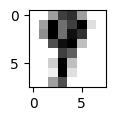

In [4]:
# Display misclassified samples, if any
mis = np.where(y_test != grid_predictions)
for i in mis[0]:
    plt.figure(figsize=(2, 1))
    im = plt.imshow(X_test[i].reshape((8,8)), cmap=plt.cm.binary)
    print(f"True: {y_test[i]}, Predicted: {grid_predictions[i]}")
    im.set_clim(0, 16)
    plt.show()

## Random Search the Best SVM

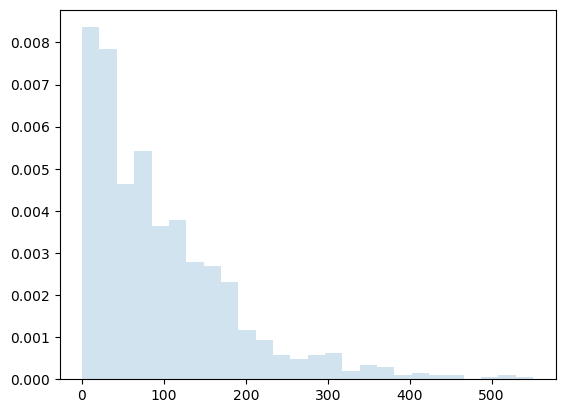

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=94.64277964378947, gamma=0.25118466820136165, kernel=sigmoid; total time=   0.4s
[CV] END C=94.64277964378947, gamma=0.25118466820136165, kernel=sigmoid; total time=   0.4s
[CV] END C=94.64277964378947, gamma=0.25118466820136165, kernel=sigmoid; total time=   0.4s
[CV] END C=94.64277964378947, gamma=0.25118466820136165, kernel=sigmoid; total time=   0.4s
[CV] END C=94.64277964378947, gamma=0.25118466820136165, kernel=sigmoid; total time=   0.4s
[CV] END C=36.702513463477985, gamma=0.14255049142591267, kernel=linear; total time=   0.1s
[CV] END C=36.702513463477985, gamma=0.14255049142591267, kernel=linear; total time=   0.1s
[CV] END C=36.702513463477985, gamma=0.14255049142591267, kernel=linear; total time=   0.1s
[CV] END C=36.702513463477985, gamma=0.14255049142591267, kernel=linear; total time=   0.1s
[CV] END C=36.702513463477985, gamma=0.14255049142591267, kernel=linear; total time=   0.1s
[CV] END C=432.118

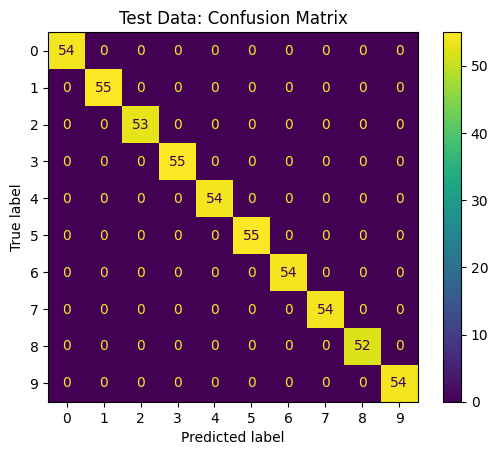

In [5]:
import scipy.stats as stats
param_dist = {'C': stats.expon(scale=100), 
              'gamma': stats.expon(scale=.1),
              'kernel': ['rbf','linear','poly','sigmoid']}

# To get a feel for the exponential distribution
random_C = stats.expon.rvs(scale=100,size=1000)
fig, ax = plt.subplots(1, 1)
ax.hist(random_C, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.show()

max_iter = 20
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=max_iter, verbose=2)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
        % ((time() - start), max_iter))

# Print best parameters after tuning
print(random_search.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(random_search.best_estimator_)

random_predictions = random_search.predict(X_test)
  
# print classification report
print(classification_report(y_test, random_predictions))

cfm = confusion_matrix(y_test, random_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = np.arange(0,10))
cm_display.plot()
plt.title('Test Data: Confusion Matrix')
plt.show()

# Display misclassified samples, if any
mis = np.where(y_test != random_predictions)
for i in mis[0]:
    plt.figure(figsize=(2, 1))
    im = plt.imshow(X_test[i].reshape((8,8)), cmap=plt.cm.binary)
    print(f"True: {y_test[i]}, Predicted: {random_predictions[i]}")
    im.set_clim(0, 16)
    plt.show()